# IRIS Dataset Analysis

This notebook demonstrates how to load and analyze the IRIS dataset using Python. We will perform basic data exploration and apply a simple machine learning model.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the IRIS dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display the first few rows of the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data Preprocessing

In [2]:
# Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Train a Random Forest Classifier

In [3]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


# SHAP Analysis

## Summary Plot

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


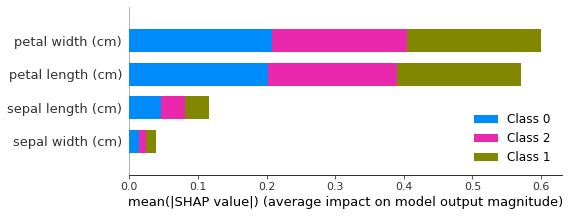

In [4]:
import shap

# Initialize SHAP Explainer with trained model
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot for feature importance
shap.summary_plot(shap_values, X_test, feature_names=X.columns.tolist())

## Dependence Plot

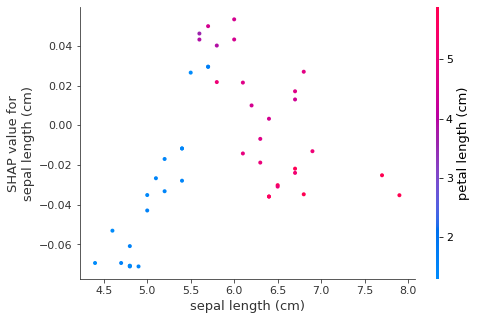

In [5]:
# SHAP Dependence Plot
# Choose a feature to visualize (e.g., 'sepal length (cm)')
shap.dependence_plot(0, shap_values[1], X_test, feature_names=X.columns.tolist())

## Interaction Plot

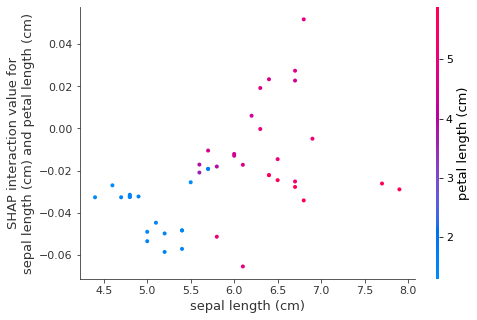

In [6]:
# SHAP Interaction Values
shap_interaction_values = explainer.shap_interaction_values(X_test)

# Plot SHAP Interaction between two features (e.g., 'sepal length (cm)' and 'petal length (cm)')
shap.dependence_plot(
    (0, 2), shap_interaction_values[1], X_test, feature_names=X.columns.tolist()
)

## Decision Plot

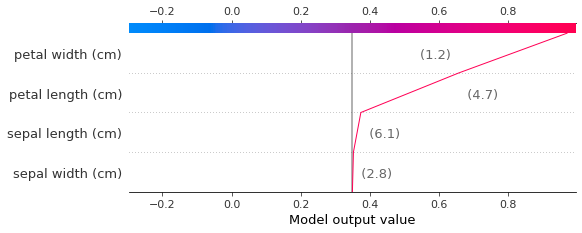

In [7]:
# SHAP Decision Plot for a single sample (e.g., the first sample in the test set)
shap.decision_plot(
    explainer.expected_value[1],
    shap_values[1][0],
    X_test.iloc[0],
    feature_names=X.columns.tolist(),
)